<a href="https://colab.research.google.com/github/rushi2012/DNN_Project/blob/main/DNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

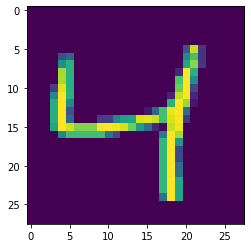

In [81]:
plt.imshow(trainsetX[2])
plt.show

In [82]:
print(trainsety[2])

4


In [83]:
print(trainsetX[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [84]:
import tensorflow as tf
Xtrain=tf.keras.utils.normalize(trainsetX,axis=1)
Xtest=tf.keras.utils.normalize(testsetX,axis=1)
Xtrain.shape

(60000, 28, 28)

In [85]:
IMG_SIZE=28
x_trainr=np.array(Xtrain).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(Xtest).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Convolution2D, MaxPooling2D

In [91]:
model = Sequential()
model.add(Convolution2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [92]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

In [93]:
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_15 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                692288    
                                                                 
 activation_16 (Activation)  (None, 64)                0         
                                                      

In [95]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [96]:
model.fit(x_trainr, trainsety, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 43s 32ms/step - loss: 0.2604 - accuracy: 0.9225 - val_loss: 0.1244 - val_accuracy: 0.9639
Epoch 2/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0904 - accuracy: 0.9730 - val_loss: 0.1028 - val_accuracy: 0.9689
Epoch 3/5
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0814 - val_accuracy: 0.9742
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0733 - val_accuracy: 0.9780
Epoch 5/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0805 - val_accuracy: 0.9771


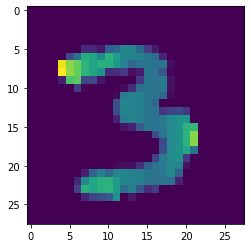

In [98]:
plt.imshow(Xtest[500])

In [99]:
pred=model.predict([x_testr])

In [100]:
print(np.argmax(pred[500]))

3


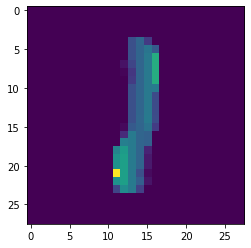

In [101]:
plt.imshow(Xtest[850])

In [102]:
print(np.argmax(pred[850]))

1
